__Teammates__

* Jorge Armando Jimenez

* Salvador Pluma

* Emmanuel de la Cruz

__Instructions__:

1. You will work on one of the datasets available on kaggle repository around COVID-19 (https://www.kaggle.com/). See the document  Descargar documentfor detailed specifications and chose a specific challenge.

2. Develop a Python notebook (file with termination “ipynb”), which will include the application of three classifiers, using the sklearn library, and eventually using a percentage T% of the samples.

3. Describe the learning process and the test results in a very well explained notebook that includes title, authors, summary, description of the work done (here will be the code), results (of the performance tests and their explanation), discussion and conclusions, with bibliographic references at the end.


__Importing Libraries__

In [54]:
# Basic Libs
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd
from scipy import stats
import seaborn as sns

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split,  cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix

# Plotting libs
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading data

In [2]:
data = pd.read_csv('./input/kaggle/country_vaccinations.csv')

In [3]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
data.shape

(86512, 15)

__Cleaning the data__

In [6]:
data.dropna(inplace=True)

__Filtering Only Mexico Data__

In [7]:
data = data[data['iso_code'] == 'MEX']

In [20]:
data.reset_index(inplace=True)

In [21]:
data.head()

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,49909,Mexico,MEX,2021-01-15,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
1,49910,Mexico,MEX,2021-01-16,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
2,49911,Mexico,MEX,2021-01-17,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
3,49912,Mexico,MEX,2021-01-18,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
4,49913,Mexico,MEX,2021-01-19,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


In [22]:
data.shape

(316, 16)

In [23]:
data['date'] = pd.to_datetime(data['date'])

In [24]:
data = data.sort_values(by='date')

In [29]:
time_passed = data['date'] - data['date'][0]

In [30]:
data['time_passed'] = time_passed

In [31]:
data

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,time_passed
0,49909,Mexico,MEX,2021-01-15,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,0 days
1,49910,Mexico,MEX,2021-01-16,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,1 days
2,49911,Mexico,MEX,2021-01-17,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2 days
3,49912,Mexico,MEX,2021-01-18,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,3 days
4,49913,Mexico,MEX,2021-01-19,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,50341,Mexico,MEX,2022-03-23,189083111.0,85538032.0,79562871.0,197446.0,271794.0,145.16,65.67,61.08,2087.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,432 days
312,50344,Mexico,MEX,2022-03-26,190197035.0,85566651.0,79662373.0,392537.0,247902.0,146.01,65.69,61.16,1903.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,435 days
313,50345,Mexico,MEX,2022-03-27,190337668.0,85573127.0,79686428.0,140633.0,224913.0,146.12,65.69,61.17,1727.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,436 days
314,50346,Mexico,MEX,2022-03-28,190441475.0,85575818.0,79693409.0,103807.0,226775.0,146.20,65.70,61.18,1741.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,437 days


In [27]:
data.dtypes

index                                           int64
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
dtype: object

In [32]:
ndata = data[['time_passed',
              'total_vaccinations',
              'people_vaccinated',
              'people_fully_vaccinated',
              'daily_vaccinations_raw',
              'daily_vaccinations',
              'total_vaccinations_per_hundred',
              'people_vaccinated_per_hundred',
              'people_fully_vaccinated_per_hundred',
              'daily_vaccinations_per_million']]

In [33]:
ndata.head()

,time_passed,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0 days,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0
1,1 days,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0
2,2 days,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0
3,3 days,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0
4,4 days,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0


In [36]:
ndata

,time_passed,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0 days,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0
1,1 days,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0
2,2 days,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0
3,3 days,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0
4,4 days,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0
...,...,...,...,...,...,...,...,...,...,...
311,432 days,189083111.0,85538032.0,79562871.0,197446.0,271794.0,145.16,65.67,61.08,2087.0
312,435 days,190197035.0,85566651.0,79662373.0,392537.0,247902.0,146.01,65.69,61.16,1903.0
313,436 days,190337668.0,85573127.0,79686428.0,140633.0,224913.0,146.12,65.69,61.17,1727.0
314,437 days,190441475.0,85575818.0,79693409.0,103807.0,226775.0,146.20,65.70,61.18,1741.0


In [37]:
ndata['time_passed'].dt.days

0        0
1        1
2        2
3        3
4        4
      ... 
311    432
312    435
313    436
314    437
315    438
Name: time_passed, Length: 316, dtype: int64

In [39]:
ndata['time_passed']=ndata['time_passed'].dt.days

In [40]:
ndata.dtypes

time_passed                              int64
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

In [41]:
ndata.shape

(316, 10)

<AxesSubplot:xlabel='time_passed'>

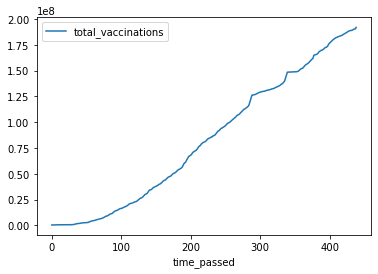

In [42]:
ndata.plot(x = 'time_passed', y = 'total_vaccinations')

In [132]:
# data_train = np.array(ndata['time_passed']).reshape(-1, 1)
data_train = ndata
target = ndata['total_vaccinations']

In [133]:
# Test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(data_train, target,test_size=0.3 , random_state=10)

In [134]:
X_train.shape, y_train.shape

((221, 10), (221,))

In [135]:
X_test.shape, y_test.shape

((95, 10), (95,))

In [136]:
reg = LinearRegression(fit_intercept=False)
reg.fit(ndata[['time_passed']],ndata.total_vaccinations)

LinearRegression(fit_intercept=False)

In [137]:
predicted = []
a = ndata.time_passed
a = list(a)
for i in a:
    predicted.append(reg.predict([[i]]))

In [138]:
npredicted = []
for i in range(len(predicted)):
    npredicted.append((predicted[i][0]))

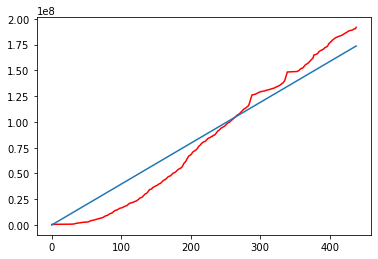

In [141]:
plt.plot(ndata['time_passed'],ndata['total_vaccinations'], color='red')
plt.plot(ndata['time_passed'],npredicted)

In [132]:
# data_train = np.array(ndata['time_passed']).reshape(-1, 1)
data_train = ndata
target = ndata['total_vaccinations']

In [133]:
# Test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(data_train, target,test_size=0.3 , random_state=10)

In [134]:
X_train.shape, y_train.shape

((221, 10), (221,))

In [135]:
X_test.shape, y_test.shape

((95, 10), (95,))

In [142]:
reg = LinearRegression(fit_intercept=True)
reg.fit(ndata[['time_passed']],ndata.total_vaccinations)

LinearRegression()

In [143]:
predicted = []
a = ndata.time_passed
a = list(a)
for i in a:
    predicted.append(reg.predict([[i]]))

In [144]:
npredicted = []
for i in range(len(predicted)):
    npredicted.append((predicted[i][0]))

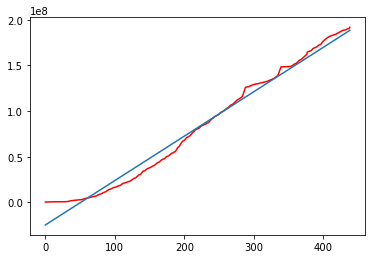

In [145]:
plt.plot(ndata['time_passed'],ndata['total_vaccinations'], color='red')
plt.plot(ndata['time_passed'],npredicted)

In [146]:
reg.coef_

array([486635.45266316])

In [148]:
reg.intercept_

-24680963.317750588

In [ ]:
def find_x_value_for_given_y(linear_model,y):
    m = linear_model.coef_
    b = linear_model.intercept_
    # y = m * x + b -> x = (y - b) / m
    (y-b) / m
    
    
    

In [ ]:
year21 = mex_cv[(mex_cv['date'] >= '2021-01-01')&(mex_cv['date'] <= '2021-12-31')]

In [ ]:
year21

In [ ]:
year21.plot(x = 'index', y = 'total_vaccinations')

In [ ]:
year22 = mex_cv[(mex_cv['date'] >= '2022-01-01')&(mex_cv['date'] <= '2022-12-31')]

In [ ]:
year22.plot(x = 'index', y = 'total_vaccinations')

In [ ]:
def show_vaccinations_per_month(year, df):
    year_str_init = str(str(year) + '-01-01')
    year_str_end = str(str(year)+'-12-31')
    aux = df[(df['date'] >= year_str_init)&(df['date'] <= year_str_end)]
    title_s = 'Total vaccionations in '+str(year)
    aux.plot(x='index', y = 'total_vaccinations', title=title_s)

In [ ]:
for year in [2021,2022]:
    show_vaccinations_per_month(year, mex_cv)

In [ ]:
mex_cv['yyyy'] = pd.to_datetime(mex_cv['date']).dt.year
mex_cv['mm'] = pd.to_datetime(mex_cv['date']).dt.month

In [ ]:
mex_cv